# MONTAR DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


# IMPORTAR LIBRERIAS

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os 
from PIL import Image 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from time import time

# FUNCIONES IMPLEMENTADAS

In [4]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [5]:
def psnr(img1, img2):
    import math
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    else:
      PIXEL_MAX = 1
      return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [6]:
def addnoise(img,mean,std):
  noisy_img = img + np.random.normal(mean, std, img.shape)
  noisy_img_clipped = np.clip(noisy_img, 0, 255)
  return noisy_img_clipped

# DENOISING CON REGRESORES (DT, SVR y RF)

### Denoising sobre el dataset MNIST

(1000, 28, 28)
DT   4


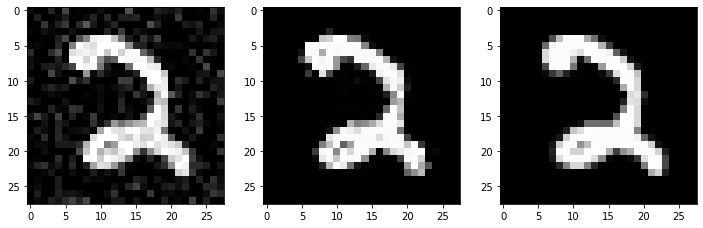

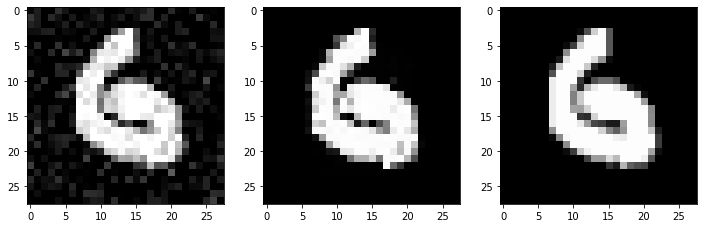

{'time': 82.59795784950256, 'mse': 0.003480718391742441, 'psnr': 24.583311119813175}
SVR   poly


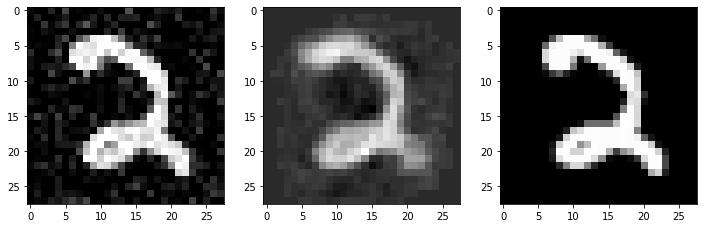

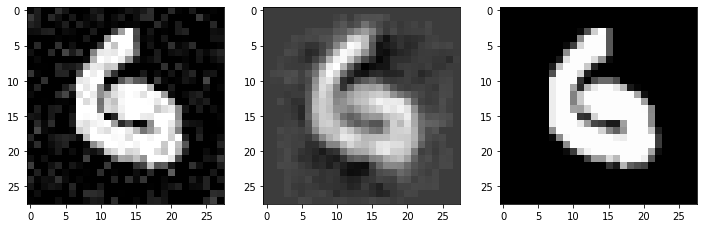

{'time': 190.62502264976501, 'mse': 0.01665497869082436, 'psnr': 17.78455918629563}
RF   2


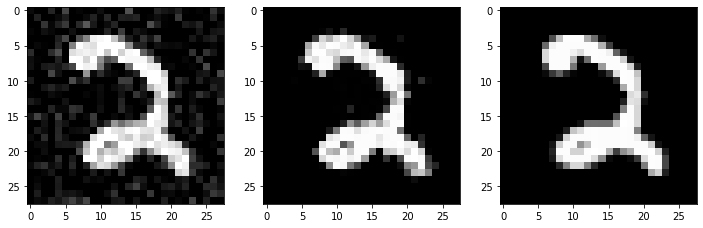

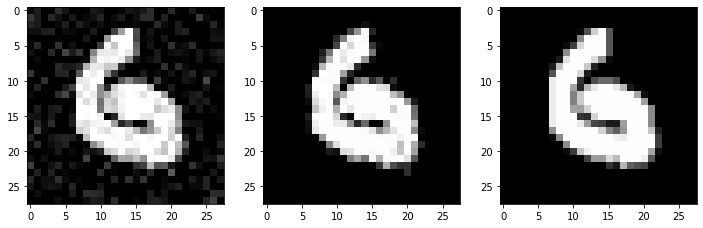

{'time': 116.90910935401917, 'mse': 0.0033998896736764004, 'psnr': 24.68535175572729}
{'DT': [{'time': 82.59795784950256, 'mse': 0.003480718391742441, 'psnr': 24.583311119813175}, {}, {}], 'SVR': [{'time': 190.62502264976501, 'mse': 0.01665497869082436, 'psnr': 17.78455918629563}, {}, {}], 'RF': [{'time': 116.90910935401917, 'mse': 0.0033998896736764004, 'psnr': 24.68535175572729}, {}, {}]}


In [8]:
(X_train, _), (X_test, _) = mnist.load_data() #EJECUTAR SI Y SOLO SI SE QUIEREN HACER PRUEBAS CON EL MNIST
X_train = X_train[:1000]
X_test = X_test[:1000]
n = int(len(X_train)*.9)
X_noisy = addnoise(X_train,1,30)
X_noisy_test = addnoise(X_test,1,30)
print(X_noisy.shape)
X_train = X_train[:n].reshape(-1,28*28)/255
X_test = X_test[n:].reshape(-1,28*28)/255
X_noisy = X_noisy[:n].reshape(-1,28*28)/255
X_noisy_test = X_noisy_test[n:].reshape(-1,28*28)/255

settings = {#Se pueden añadir o cambiar valores de estos parametros de cada regresor pero el tiempo de ejecución aumenta considerablemente
    "DT": [4], #Depth
    "SVR": ["poly"], #Kernel
    "RF": [2] #n_estimators
}

results = {
    "DT": [{}, {}, {}],
    "SVR": [{}, {}, {}],
    "RF": [{}, {}, {}]
}

for i in settings:
  setting = settings[i]

  for j in range(len(settings["DT"])):
    value = setting[j]

    if i == "DT":
      reg = DecisionTreeRegressor(max_depth=value)
    elif i == "SVR":
      reg = SVR(kernel=value)
    elif i == "RF": 
      reg = RandomForestRegressor(max_depth=5, n_estimators=value)

    tic = time()

    est = MultiOutputRegressor(estimator=reg)
    est.fit(X_noisy.reshape(-1, 28*28), X_train.reshape(-1, 28*28))

    yest = est.predict(X_noisy_test.reshape(-1, 28*28))
    yestImg = yest.reshape(-1, 28, 28)

    results[i][j]["time"] = time()-tic
    results[i][j]["mse"] = mean_squared_error(X_test.reshape(-1, 28*28), yest)
    results[i][j]["psnr"] = psnr(X_test.reshape(-1, 28*28), yest)

    print("%s   %s" %(i, value))

    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.imshow(X_noisy_test[5].reshape(28,28), cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yestImg[5], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(X_test[5].reshape(28,28), cmap='gray')

    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.imshow(X_noisy_test[3].reshape(28,28), cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yestImg[3], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(X_test[3].reshape(28,28), cmap='gray')

    plt.show()

    print(results[i][j])

print(results)

### Denoising sobre el dataset Fashion MNIST

4423680/4422102 [==============================] - 0s 0us/step
(1000, 28, 28)
DT   4


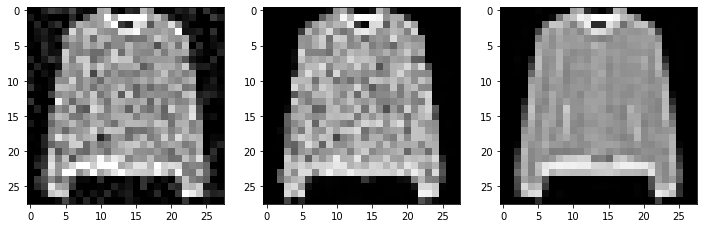

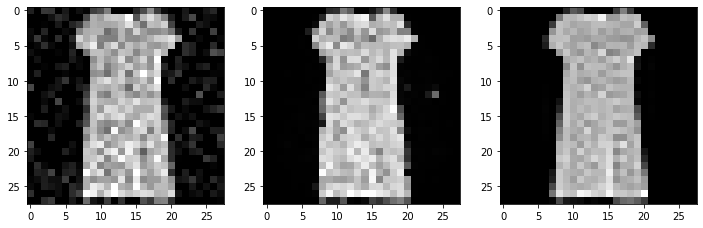

{'time': 142.6726474761963, 'mse': 0.007302263216291597, 'psnr': 21.36542516589975}
SVR   poly


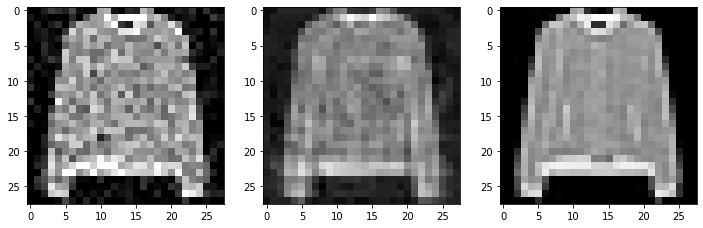

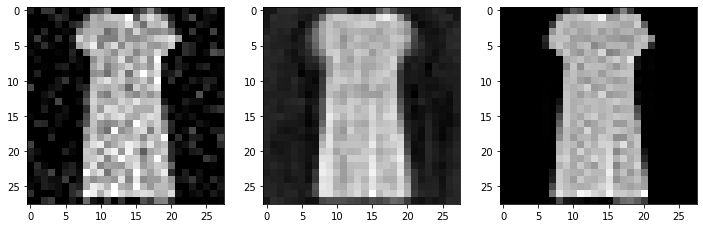

{'time': 317.8827049732208, 'mse': 0.01980834912230412, 'psnr': 17.031517181489697}
RF   2


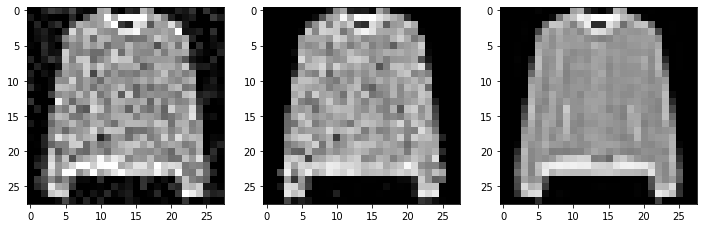

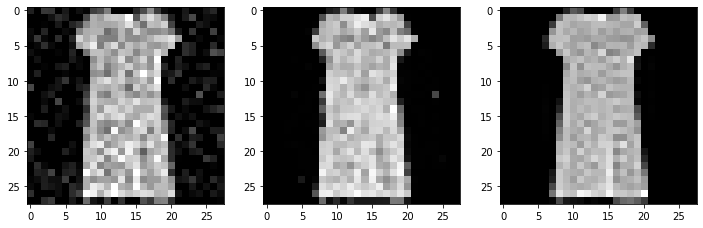

{'time': 199.50328636169434, 'mse': 0.006769152376510998, 'psnr': 21.69465709638439}
{'DT': [{'time': 142.6726474761963, 'mse': 0.007302263216291597, 'psnr': 21.36542516589975}, {}, {}], 'SVR': [{'time': 317.8827049732208, 'mse': 0.01980834912230412, 'psnr': 17.031517181489697}, {}, {}], 'RF': [{'time': 199.50328636169434, 'mse': 0.006769152376510998, 'psnr': 21.69465709638439}, {}, {}]}


In [9]:
(X_train, _), (X_test, _) = tf.keras.datasets.fashion_mnist.load_data() #EJECUTAR SI Y SOLO SI SE QUIEREN HACER PRUEBAS CON EL FASHION MNIST
X_train = X_train[:1000]
X_test = X_test[:1000]
n = int(len(X_train)*.9)
X_noisy = addnoise(X_train,1,30)
X_noisy_test = addnoise(X_test,1,30)
print(X_noisy.shape)
X_train = X_train[:n].reshape(-1,28*28)/255
X_test = X_test[n:].reshape(-1,28*28)/255
X_noisy = X_noisy[:n].reshape(-1,28*28)/255
X_noisy_test = X_noisy_test[n:].reshape(-1,28*28)/255

settings = {#Se pueden añadir o cambiar valores de estos parametros de cada regresor pero el tiempo de ejecución aumenta considerablemente
    "DT": [4], #Depth
    "SVR": ["poly"], #Kernel
    "RF": [2] #n_estimators
}

results = {
    "DT": [{}, {}, {}],
    "SVR": [{}, {}, {}],
    "RF": [{}, {}, {}]
}

for i in settings:
  setting = settings[i]

  for j in range(len(settings["DT"])):
    value = setting[j]

    if i == "DT":
      reg = DecisionTreeRegressor(max_depth=value)
    elif i == "SVR":
      reg = SVR(kernel=value)
    elif i == "RF": 
      reg = RandomForestRegressor(max_depth=5, n_estimators=value)

    tic = time()

    est = MultiOutputRegressor(estimator=reg)
    est.fit(X_noisy.reshape(-1, 28*28), X_train.reshape(-1, 28*28))

    yest = est.predict(X_noisy_test.reshape(-1, 28*28))
    yestImg = yest.reshape(-1, 28, 28)

    results[i][j]["time"] = time()-tic
    results[i][j]["mse"] = mean_squared_error(X_test.reshape(-1, 28*28), yest)
    results[i][j]["psnr"] = psnr(X_test.reshape(-1, 28*28), yest)

    print("%s   %s" %(i, value))

    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.imshow(X_noisy_test[5].reshape(28,28), cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yestImg[5], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(X_test[5].reshape(28,28), cmap='gray')

    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.imshow(X_noisy_test[3].reshape(28,28), cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yestImg[3], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(X_test[3].reshape(28,28), cmap='gray')

    plt.show()

    print(results[i][j])

print(results)

### Denoising sobre el dataset Natural Images

DT   4


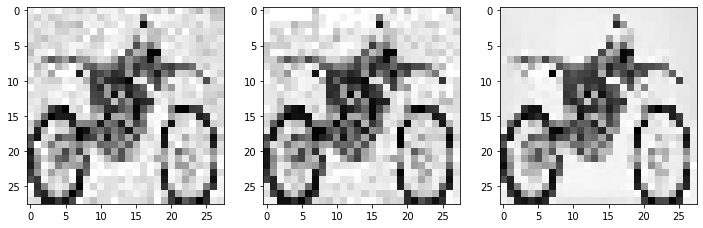

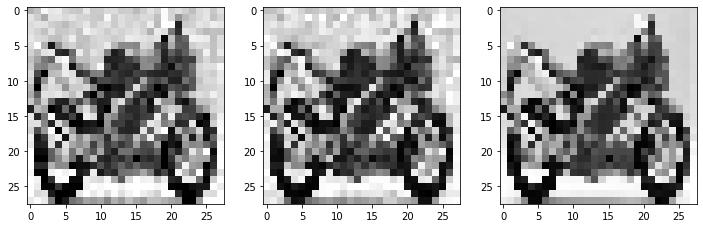

{'time': 125.319411277771, 'mse': 0.003727668455502229, 'psnr': 24.285627214116587}
SVR   poly


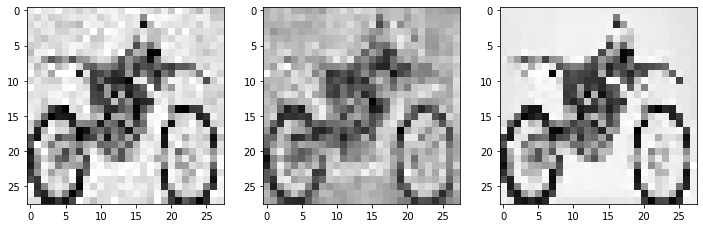

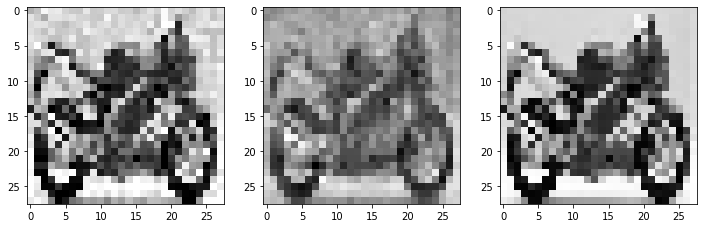

{'time': 266.0993630886078, 'mse': 0.029415473658086014, 'psnr': 15.314241540609348}
RF   2


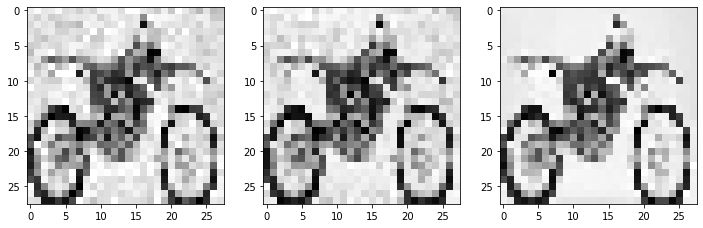

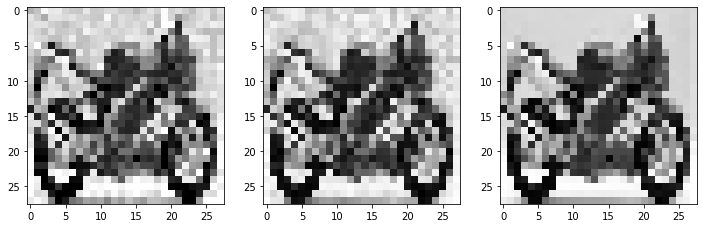

{'time': 181.4136848449707, 'mse': 0.003823624859254464, 'psnr': 24.17524723495227}
{'DT': [{'time': 125.319411277771, 'mse': 0.003727668455502229, 'psnr': 24.285627214116587}, {}, {}], 'SVR': [{'time': 266.0993630886078, 'mse': 0.029415473658086014, 'psnr': 15.314241540609348}, {}, {}], 'RF': [{'time': 181.4136848449707, 'mse': 0.003823624859254464, 'psnr': 24.17524723495227}, {}, {}]}


In [10]:
X = []
for name in ['motorbike']:
  for fname in os.listdir('natural_images/'+name+'/'):
    struct = cv2.imread('natural_images/'+name+'/'+fname)
    struct = rgb2gray(struct)
    struct = cv2.resize(struct,(28,28),Image.ANTIALIAS)
    X.append(struct.flatten())
X = np.array(X)
X_noisy = addnoise(X,1,15)
X,y = X_noisy/255, X/255
x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1,28**2),y.reshape(-1,28**2),test_size = 0.1)

settings = {#Se pueden añadir o cambiar valores de estos parametros de cada regresor pero el tiempo de ejecución aumenta considerablemente
    "DT": [4], #Depth
    "SVR": ["poly"], #Kernel
    "RF": [2] #n_estimators
}

results = {
    "DT": [{}, {}, {}],
    "SVR": [{}, {}, {}],
    "RF": [{}, {}, {}]
}

for i in settings:
  setting = settings[i]

  for j in range(len(settings["DT"])):
    value = setting[j]

    if i == "DT":
      reg = DecisionTreeRegressor(max_depth=value)
    elif i == "SVR":
      reg = SVR(kernel=value)
    elif i == "RF": 
      reg = RandomForestRegressor(max_depth=5, n_estimators=value)

    tic = time()

    est = MultiOutputRegressor(estimator=reg)
    est.fit(x_train.reshape(-1, 28*28), y_train.reshape(-1, 28*28))

    yest = est.predict(x_test.reshape(-1, 28*28))
    yestImg = yest.reshape(-1, 28, 28)

    results[i][j]["time"] = time()-tic
    results[i][j]["mse"] = mean_squared_error(y_test.reshape(-1, 28*28), yest)
    results[i][j]["psnr"] = psnr(y_test.reshape(-1, 28*28), yest)

    print("%s   %s" %(i, value))

    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.imshow(x_test[5].reshape(28,28), cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yestImg[5], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(y_test[5].reshape(28,28), cmap='gray')

    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    plt.imshow(x_test[3].reshape(28,28), cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yestImg[3], cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(y_test[3].reshape(28,28), cmap='gray')

    plt.show()

    print(results[i][j])

print(results)

# DENOISING CON AUTOENCODER (MNIST o FASHION MNIST)
## AUTOENCODER HECHO CON CAPAS DENSAS

###EJECUTAR SOLO SI SE QUIEREN HACER PRUEBAS CON EL MNIST

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data() 
X_noisy = addnoise(X_train[:],1,30)
X_noisy_test = addnoise(X_test[:],1,30)
print(X_noisy.shape)
X_train = X_train.reshape(-1,28*28)/255
X_test = X_test.reshape(-1,28*28)/255
X_noisy = X_noisy.reshape(-1,28*28)/255
X_noisy_test = X_noisy_test.reshape(-1,28*28)/255

(60000, 28, 28)


###EJECUTAR SOLO SI SE QUIEREN HACER PRUEBAS CON EL FASHION MNIST

In [ ]:
(X_train, _), (X_test, _) = tf.keras.datasets.fashion_mnist.load_data() 
X_noisy = addnoise(X_train[:],1,30)
X_noisy_test = addnoise(X_test[:],1,30)
print(X_noisy.shape)
X_train = X_train.reshape(-1,28*28)/255
X_test = X_test.reshape(-1,28*28)/255
X_noisy = X_noisy.reshape(-1,28*28)/255
X_noisy_test = X_noisy_test.reshape(-1,28*28)/255

(60000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_dim=np.prod(X_train[0].shape), activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu')) 
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(np.prod(X_train[0].shape),activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_noisy,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0142
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0122
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0112
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0098
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091


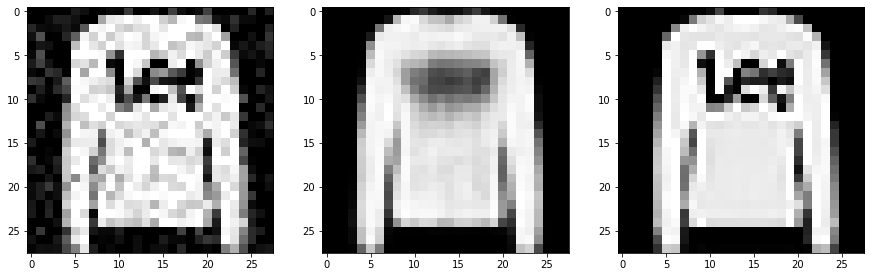

In [ ]:
y_au = model.predict(X_noisy_test)
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(X_noisy_test[1].reshape(28,28),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(y_au[1].reshape(28,28),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(X_test[1].reshape(28,28),cmap='gray')

In [ ]:
psnr(y_au.reshape(-1,28,28),X_test.reshape(-1,28,28))

20.29300001701269

In [ ]:
print(y_au[1].min(),y_au[1].max())
print(X_test[1].min(),X_test[1].max())

3.170469e-18 0.99647576
0.0 1.0


#DENOISING CON AUTOENCODER (NATURAL IMAGES)
## AUTOENCODER HECHO CON CAPAS DENSAS

Pruebas para lograr que una red genere una imagen igual a la que se le pasó como entrada

In [ ]:
X = []
for name in ['motorbike']:
  for fname in os.listdir('natural_images/'+name+'/'):
    struct = cv2.imread('natural_images/'+name+'/'+fname)
    struct = rgb2gray(struct)
    struct = cv2.resize(struct,(128,128),Image.ANTIALIAS)
    X.append(struct.flatten())
X = np.array(X)
X_noisy = addnoise(X,1,15)
X,y = X_noisy/255, X/255
x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1,128**2),y.reshape(-1,128**2),test_size = 0.1)

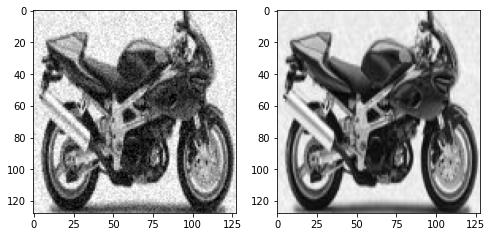

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(x_train[10].reshape(128,128),cmap='gray')
plt.subplot(122)
plt.imshow(y_train[10].reshape(128,128),cmap='gray')

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=x_train[1].shape),
      tf.keras.layers.Dense(8192, activation='relu'),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(8192, activation='relu'),
      tf.keras.layers.Dense(np.prod(x_train[1].shape))
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
model.fit(y_train,y_train,epochs=50,batch_size=10,validation_data=(y_test,y_test))

Epoch 1/50
63/63 [==============================] - 5s 75ms/step - loss: 0.1013 - val_loss: 0.0510
Epoch 2/50
63/63 [==============================] - 5s 73ms/step - loss: 0.0487 - val_loss: 0.0444
Epoch 3/50
63/63 [==============================] - 5s 73ms/step - loss: 0.0430 - val_loss: 0.0415
Epoch 4/50
63/63 [==============================] - 5s 74ms/step - loss: 0.0393 - val_loss: 0.0383
Epoch 5/50
63/63 [==============================] - 5s 74ms/step - loss: 0.0358 - val_loss: 0.0369
Epoch 6/50
63/63 [==============================] - 5s 74ms/step - loss: 0.0345 - val_loss: 0.0353
Epoch 7/50
63/63 [==============================] - 5s 73ms/step - loss: 0.0318 - val_loss: 0.0341
Epoch 8/50
63/63 [==============================] - 5s 73ms/step - loss: 0.0301 - val_loss: 0.0336
Epoch 9/50
63/63 [==============================] - 5s 73ms/step - loss: 0.0289 - val_loss: 0.0319
Epoch 10/50
63/63 [==============================] - 5s 73ms/step - loss: 0.0275 - val_loss: 0.0315
Epoch 11/

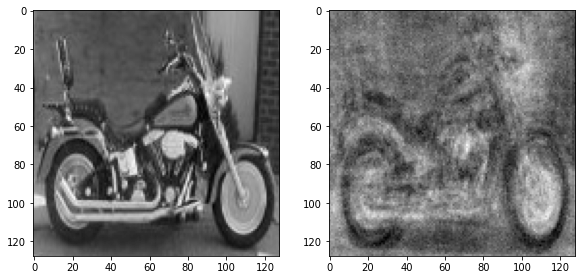

In [ ]:
y_au = model.predict(y_test.reshape(-1,16384))
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(y_test[21].reshape(128,128),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(y_au[21].reshape(128,128),cmap='gray')
#plt.subplot(1,3,3)
#plt.imshow(y_test[0].reshape(128,128),cmap='gray')

In [ ]:
psnr(y_au,y_test)

15.294917595229558

##DENOISING 

In [ ]:
X = []
for name in ['motorbike']:
  for fname in os.listdir('natural_images/'+name+'/'):
    struct = cv2.imread('natural_images/'+name+'/'+fname)
    struct = rgb2gray(struct)
    struct = cv2.resize(struct,(128,128),Image.ANTIALIAS)
    X.append(struct.flatten())
X = np.array(X)
X_noisy = addnoise(X,1,15)
X,y = X_noisy/255, X/255
x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1,128**2),y.reshape(-1,128**2),test_size = 0.1)

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=x_train[1].shape),
      tf.keras.layers.Dense(8192, activation='relu'),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(8192, activation='relu'),
      tf.keras.layers.Dense(np.prod(x_train[1].shape))
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
model.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/10
63/63 [==============================] - 5s 75ms/step - loss: 0.1041 - val_loss: 0.0532
Epoch 2/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0474 - val_loss: 0.0493
Epoch 3/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0430 - val_loss: 0.0434
Epoch 4/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0402 - val_loss: 0.0411
Epoch 5/10
63/63 [==============================] - 5s 74ms/step - loss: 0.0367 - val_loss: 0.0385
Epoch 6/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0330 - val_loss: 0.0372
Epoch 7/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0316 - val_loss: 0.0362
Epoch 8/10
63/63 [==============================] - 5s 72ms/step - loss: 0.0301 - val_loss: 0.0349
Epoch 9/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0279 - val_loss: 0.0339
Epoch 10/10
63/63 [==============================] - 5s 73ms/step - loss: 0.0267 - val_loss: 0.0331


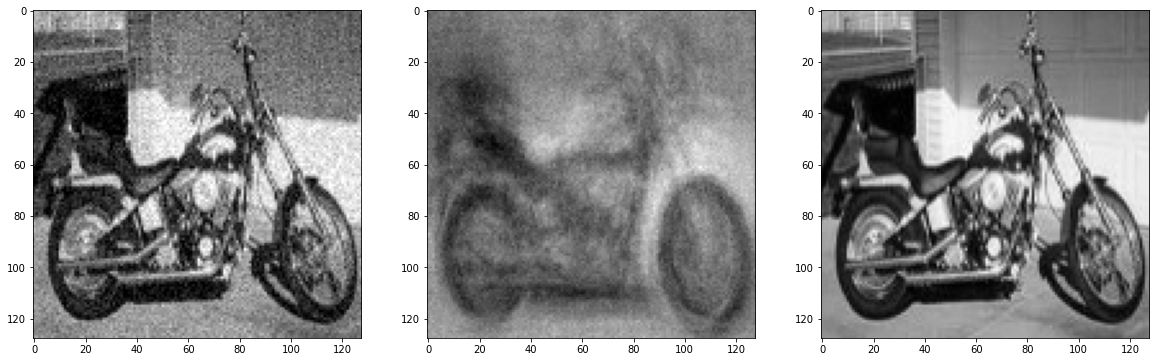

In [ ]:
y_au = model.predict(x_test)
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.imshow(x_test[3].reshape(128,128),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(y_au[3].reshape(128,128),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(y_test[3].reshape(128,128),cmap='gray')

In [ ]:
psnr(y_au,y_test)

14.797134940503213

# DENOISING CON CNN (MNIST o FASHION MNIST)

###EJECUTAR SOLO SI SE QUIEREN HACER PRUEBAS CON EL MNIST

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data() 
X_noisy = addnoise(X_train[:],1,30)
X_noisy_test = addnoise(X_test[:],1,30)
X_train = np.expand_dims(X_train,axis=-1)/255
X_test = np.expand_dims(X_test,axis=-1)/255
X_noisy = np.expand_dims(X_noisy,axis=-1)/255
X_noisy_test = np.expand_dims(X_noisy_test,axis=-1)/255
print(X_noisy.shape)

(60000, 28, 28, 1)


###EJECUTAR SOLO SI SE QUIEREN HACER PRUEBAS CON EL FASHION MNIST

In [ ]:
(X_train, _), (X_test, _) = tf.keras.datasets.fashion_mnist.load_data() 
X_noisy = addnoise(X_train[:],1,30)
X_noisy_test = addnoise(X_test[:],1,30)
X_train = np.expand_dims(X_train,axis=-1)/255
X_test = np.expand_dims(X_test,axis=-1)/255
X_noisy = np.expand_dims(X_noisy,axis=-1)/255
X_noisy_test = np.expand_dims(X_noisy_test,axis=-1)/255
print(X_noisy.shape)

(60000, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=X_train[0].shape),
      tf.keras.layers.Conv2D(64,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(32,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(8,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,3,activation='relu',padding='same')
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.fit(X_noisy,X_train,epochs=10,batch_size=32,validation_data=(X_test,X_noisy_test))

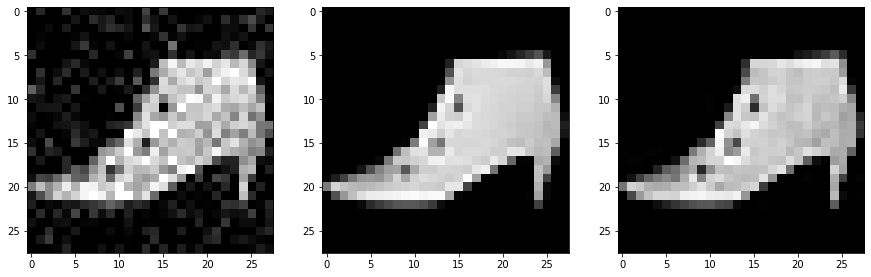

In [ ]:
y_au = model.predict(X_test)
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(X_noisy_test[132].reshape(28,28),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(y_au[132].reshape(28,28),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(X_test[132].reshape(28,28),cmap='gray')

In [ ]:
psnr(y_au,X_test)

29.024520409911023

# DENOISING CON CNN (Natural Images)

In [ ]:
X = []
for name in ['motorbike']:
  for fname in os.listdir('natural_images/'+name+'/'):
    struct = cv2.imread('natural_images/'+name+'/'+fname)
    struct = rgb2gray(struct)
    struct = cv2.resize(struct,(128,128),Image.ANTIALIAS)
    X.append(struct.flatten())
X = np.array(X)
X_noisy = addnoise(X,1,15)
X,y = X_noisy/255, X/255
x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1,128**2),y.reshape(-1,128**2),test_size = 0.1)

In [ ]:
x_train = x_train.reshape(-1,128,128,1)
y_train = y_train.reshape(-1,128,128,1)
x_test = x_test.reshape(-1,128,128,1)
y_test = y_test.reshape(-1,128,128,1)
model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=x_train[0].shape),
      tf.keras.layers.Conv2D(64,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(32,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(8,3,activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,3,activation='relu',padding='same')
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

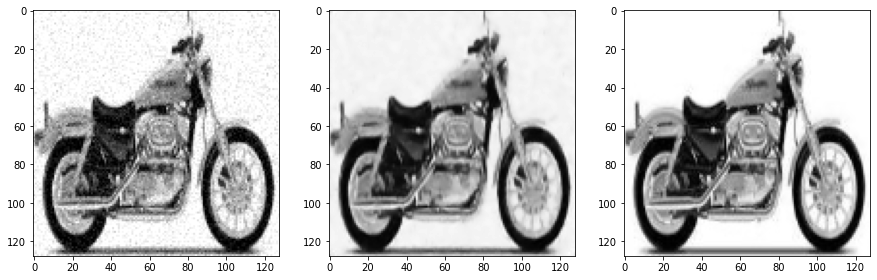

In [ ]:
y_au = model.predict(x_test)
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(x_test[78].reshape(128,128),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(y_au[78].reshape(128,128),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(y_test[78].reshape(128,128),cmap='gray')

In [ ]:
psnr(y_au,y_test)

28.912845732567668

# FIN